# Data Scientist Test

## Theoretical Test

1. Differentiate Machine Learning, artificial intelligence, and data science.
   
       - Machine Learning (ML) is the field of study that gives compters the ability to learn without being explicitly programmed.
       - The broad definition of Artificial Intelligence (AI) depends of what humans define as intelligence. For simple and practical terms, it refers to systems or machines that mimic human intelligence to perform tasks and can iteratively improve themselves based on the information they collect. The difference between AI and ML is subtle, and historically ML has often been considered a subfield of AI.
       - Data Science (DS) is a relatively new applied field that is distinguished from the AI and ML because its objective is to gain insight and understanding. DS typically makes use ML methods as well as statistical and visualization methods to obtain valuable information from data.
       

2. What is the difference between linear regression and logistic regression?
   
       - Linear Regression and Logistic Regression are the two famous ML algorithms used for supervised learning technique, which means both the algorithms require labeled dataset to make the predictions. Their main difference is that Linear Regression is used for solving Regression problems using continuous numerical values, whereas Logistic Regression is used for Classification using cathegorical values.

3. Explain the curse of dimensionality?
   
       - It refers to the fact that the number of samples needed to estimate an arbitrary function with a given level of accuracy grows exponentially with respect to the number of input variables (i.e., dimensionality) of the function.
       - It is very problem for ML and DS because of the frequent use of high-dimensional datasets. Some of the difficulties that come with high dimensional data manifest during analyzing or visualizing the data to identify patterns and also while training machine learning models.


4. What are precision, recall, f-measure, and roc? Explain what they are and when we use each one?
   
       - Precision gives the proportion of positive identifications that were classified correctly. A model that produces no false positives has a Precision of 1.0. Should be used when ones need to be restrict against *false positives*
       - Recall gives the proportion of actual positives was identified correctly. A model that produces no false negatives has a recall of 1.0. Should be used when ones need to be restrict against *false negatives*
       - F-measure is a convinent way of combining the Precision and Recall of the model into a single metric. Formally it is defined as the harmonic mean between Precision and Recall, which gives much more weight to low values, so a F-measure will only get a high value when both Precision and Recall are high. Can be used for comparing two or more classification models on the same dataset. 
       - ROC (curve) is a graph showing the performance of a classification model at all classification thresholds. It is the plot of *true positive rate* (Recall) against the *false positive rate*.



5. What is the difference between train set, test set, and validation set?
   
       - To obtain a reliable ML model it is a general practice of splits the full dataset in these three sets of data: train, test and validation. 
       - Train set: it is the actual dataset from which a ML model trains, .i.e., the model sees and learns from this data to predict the outcome or to make the right decisions.
       - Test set: it is the sample of data used to provide an unbiased evaluation of a final model fit on the training dataset.
       - Validation set: it is the sample of data used to provide an unbiased evaluation of a model fit on the training dataset while tuning model hyperparameters. That is needed because the evaluation becomes more biased as skill on the validation dataset is incorporated into the model configuration.

6. What is the p-value? It's a reliable measurement? How can we be sure?
   
        - It is a tool used for hypothesis testing, for instance, to verify is a subset of a dataset is representative of the whole dataset. Formally, the p-value is the probability of finding the observed result (or more extreme) when the Null Hypothesis of a study question is true.

7. What is PCA?
   
        - Pricipal Component Analysis is the most popular dimensionality reduction algorithm, by transforming a large set of variables into a smaller one that still contains most of the information in the large set. In a multimensional dataset, PCA identifies the axis that accounts for the largest amount of variance in the dataset (the principal component), after that it goes for the next components. The resulting new axis are orthogonal among themselves, and have decreasing variance values. The usefulness of the methods for data science comes from the fact that most usefull information will be represented by the first components, i.e., dimensionality reduction.


## Practical Test

In [83]:
#!pip3 install -q snscrape


In [70]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

import snscrape.modules.twitter as sntwitter
import datetime
import itertools
import time

#
import utility_funcs


### Build a scraper

------

#### Part 1: Find a list of 50 random profiles with over 1k followers on Twitter

Some utility funcions are defined in the file "utility_funcs.py" and were imported as module `utility_funcs`.

The *snscrape* tool is used to access Twitter (https://github.com/JustAnotherArchivist/snscrape).

Note:

- After having performed all the installations and tests with this Python scraper, I start suffering with an unsolved bug (https://github.com/JustAnotherArchivist/snscrape/issues/423). I could not find how to quickly replace this scraper for another one, so I have made a sort of wrapper funcion to provide incremental searches for different time ranges. This python function is defined in the "utility_funcs.py" file.




In [2]:
# Step #1: get a list of 50 Twitter profiles with over 1k followers

def get_profile_list():
    
    text = '(#happy AND #family) OR (#happy AND #nature) OR (#nature AND #love) lang:en ' # filter:verified'

    max_items = 600
    max_searches = 10
    delta_days = 60

    dfu0 = utility_funcs.get_posts_from_user_df(text=text,
                                                max_items=max_items, max_searches=max_searches, 
                                                delta_days=delta_days, verbose=False)
    
    dfu1 = dfu0.copy()
    dfu1.insert(0, 'followersCount', dfu1.user.apply(lambda x: x['followersCount']))
    
    # keeping only profiles with over 1k followers
    dfu2 = dfu1.loc[dfu1.followersCount > 1000]
    print('Minimum count: ', dfu2.followersCount.min())
    
    # getting the unique profile names
    lst_profiles = np.random.permutation(dfu2.user.apply(lambda x: x['username']).unique()).tolist()
        
    return lst_profiles


In [12]:
# randomly sorted list of profile usernames

lst_profiles = get_profile_list()

print(len(lst_profiles))

if len(lst_profiles) >100:
    np.savetxt('list_profiles.txt', np.array(lst_profiles).astype(str), fmt='%s')

#print(lst_profiles) # should have at least 50 names

    Something went wrong, probably the known bug of snscraper. Will try to continue... [1/3]
Minimum count:  1003
127
['KelleyCostigan', 'Monireh68', 'OurPactApp', 'kittyLuvsHorror', 'RenatatarotA', 'KikiEly', 'lopezgovlaw', 'therealqball', 'KanexonOfficial', 'newthoughtlife', 'staybushbaby', 'melindasspencer', 'MyStart_com', 'kaleyokelley', 'AngelicaKate5', 'iwpacademyindia', 'TheRacingHeart', 'shamasikander', 'Stefanonyc212', 'davebrownsound', 'tpointweather', 'marsh_bay', 'maxbhill', 'AdamPlotkin', 'GijoVijayan', 'techvizbiz', 'club_multiple', 'TheNationalNoVa', 'MineOthers', 'Renthal_Moto', 'ane_naiz', 'mathieucadart', 'MardiEdge', 'VisitOromia', 'planbeeltd', 'LuLu_Mall', 'pnwkate', 'lelobusafaris', 'HikingAutism', 'Sneshka_Richter', 'SSIslandResort', 'alexgrey2222', 'clothofnature', 'iGirishNarkhede', 'MysticWhiteRo', 'namitadas21', 'shellmarchese', 'WWTravelMag', 'lgibson12397', 'MetroChrysOtt', 'BuyDirectUSA', 'AuthorHudak', 'BranislavMelis_', 'VanHage', 'jparlbk', 'HappyMy_Lov

In [71]:
lst_profiles = np.loadtxt('list_profiles.txt', dtype=str).tolist()
#lst_profiles


#### Part 2: Collect information for each of the 50 profiles


------
Build a simple web scraper to collect data from 50 random profiles with over 1k
followers on Twitter. The information that should be collected is:

- Username
- Displayed Name
- Description
- Number of Followers
- Number of Following
- Birthday
- Data that joined Twitter
- Website
- Within the last 50 posts
  - Number of favorites
  - Number of retweets
  - Number of replies

With this data in hand, generate a report. It should have at least the following
information:

- Number of tweets per day
- Number of tweets per week
- Number of tweets per month
- Mean of tweets per day
- Mean of tweets per week
- Mean of tweets per month
- Median of tweets per day
- Median of tweets per week
- Median of tweets per month

------



Using the list of profiles obtained above (`lst_profiles`), the next step is to retrieve data from the last 50 posts from the 50 profiles with over 1k followers.

The result will be store in a dataframe called `df_u0`

In [21]:

t0 = time.time()

n_profiles = 50
last_posts = 50

count = 0

df_lst = []


for i,profile in enumerate(lst_profiles):

    print('[{:02d}/{:02d}] - Scraping for profile: {}'.format(count+1, n_profiles, profile))

    text = "lang:en"
    max_searches = 20 # for each user
    max_items = last_posts
    delta_days=60

    try: 
        
        dfu = utility_funcs.get_posts_from_user_df(from_user=profile, text=text,
                                                max_items=max_items, max_searches=max_searches, 
                                                delta_days=delta_days, verbose=False)       
        
        dfu.insert(0, 'Username', dfu.iloc[0].user['username'])

        if (dfu.shape[0] == last_posts) and (dfu.iloc[0].user['followersCount'] > 1000):
            df_lst.append(dfu)
            
            print(dfu.shape)
            
            del dfu
            count += 1
        
        else:
            print('    Coundnt get enought posts. Skipping this profile: {} \n'.format(username))
        
        
        if count == n_profiles:
            break
            
    except:
        print(' Some other problem. Skipping this one.\n')        
        #count -= 1

        
df_u0 = pd.concat(df_lst)
df_u0 = df_u0.reset_index(drop='index')

df_u0.shape

del df_lst

print('  ** Total time: {:.1f} seconds.'.format(time.time()-t0))

df_u0.to_hdf('profiles_concat_samples.h5', key='df', mode='w')



[01/50] - Scraping for profile: KelleyCostigan
(50, 29)
[02/50] - Scraping for profile: Monireh68
(50, 29)
[03/50] - Scraping for profile: OurPactApp
(50, 29)
[04/50] - Scraping for profile: kittyLuvsHorror
(50, 29)
[05/50] - Scraping for profile: RenatatarotA
(50, 29)
[06/50] - Scraping for profile: KikiEly
(50, 29)
[07/50] - Scraping for profile: lopezgovlaw
(50, 29)
[08/50] - Scraping for profile: therealqball
(50, 29)
[09/50] - Scraping for profile: KanexonOfficial
(50, 29)
[10/50] - Scraping for profile: newthoughtlife
(50, 29)
[11/50] - Scraping for profile: staybushbaby
(50, 29)
[12/50] - Scraping for profile: melindasspencer
(50, 29)
[13/50] - Scraping for profile: MyStart_com
(50, 29)
[14/50] - Scraping for profile: kaleyokelley
    Something went wrong, probably the known bug of snscraper. Will try to continue... [1/3]
    Something went wrong, probably the known bug of snscraper. Will try to continue... [2/3]
(50, 29)
[15/50] - Scraping for profile: AngelicaKate5
(50, 29)
[1

/tmp/ipykernel_134805/2836935390.py:57: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->Index(['Username', 'url', 'content', 'renderedContent', 'user', 'lang',
       'source', 'sourceUrl', 'sourceLabel', 'outlinks', 'tcooutlinks',
       'media', 'retweetedTweet', 'quotedTweet', 'inReplyToTweetId',
       'inReplyToUser', 'mentionedUsers', 'coordinates', 'place', 'hashtags',
       'cashtags', 'card'],
      dtype='object')]

  df_u0.to_hdf('profiles_concat_samples.h5', key='df', mode='w')


In [22]:
# reading from saved dataset
df_u0 = pd.read_hdf('profiles_concat_samples.h5', 'df')

In [72]:
lst_unique = df_u0.Username.unique()

Checking the results:

In [74]:
df_u1 = df_u0[df_u0.Username==lst_unique[3]] #.reset_index(drop='index')
df_u0.head(5)

,Username,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,...,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,card
0,KelleyCostigan,https://twitter.com/KelleyCostigan/status/1502...,2022-03-11 09:26:05+00:00,"@bailey_patrick Aw, hope you had a very happy ...","@bailey_patrick Aw, hope you had a very happy ...",1502214265595478016,"{'username': 'KelleyCostigan', 'id': 395429111...",0,0,1,...,None,None,1501915164643373056.0,"{'username': 'bailey_patrick', 'id': 342750444...","[{'username': 'bailey_patrick', 'id': 34275044...",None,None,None,None,None
1,KelleyCostigan,https://twitter.com/KelleyCostigan/status/1502...,2022-03-11 08:49:20+00:00,A huge shout out to all the carers out there! ...,A huge shout out to all the carers out there! ...,1502205017721352192,"{'username': 'KelleyCostigan', 'id': 395429111...",0,0,1,...,None,None,NaN,None,None,None,None,"[carers, carer, mentalhealth, health]",None,None
2,KelleyCostigan,https://twitter.com/KelleyCostigan/status/1501...,2022-03-10 15:33:33+00:00,Life has just been throwin’ me curve ball afte...,Life has just been throwin’ me curve ball afte...,1501944353211650048,"{'username': 'KelleyCostigan', 'id': 395429111...",4,2,21,...,None,None,NaN,None,None,None,None,"[pullaface, tryingtobepositive]",None,None
3,KelleyCostigan,https://twitter.com/KelleyCostigan/status/1501...,2022-03-09 17:50:29+00:00,@FindlayLouis I live in Stratford-upon-Avon. H...,@FindlayLouis I live in Stratford-upon-Avon. H...,1501616427471626247,"{'username': 'KelleyCostigan', 'id': 395429111...",0,0,2,...,None,None,1501548645975474176.0,"{'username': 'FindlayLouis', 'id': 2828411273,...","[{'username': 'FindlayLouis', 'id': 2828411273...",None,None,None,None,None
4,KelleyCostigan,https://twitter.com/KelleyCostigan/status/1501...,2022-03-08 21:49:35+00:00,@CorrugatedCava1 @Incognitiously @dyddgu @laur...,@CorrugatedCava1 @Incognitiously @dyddgu @laur...,1501314212534042631,"{'username': 'KelleyCostigan', 'id': 395429111...",1,0,3,...,None,None,1501312534179110912.0,"{'username': 'CorrugatedCava1', 'id': 13033244...","[{'username': 'CorrugatedCava1', 'id': 1303324...",None,None,None,None,None


#### Here we define a python function to obtain the information and statistics for each profile.

Notes:

- Could not get the birthday using a scraping tool. As a workaround, I did a very naive way: I check for each profile (using `utility_funcs.get_birthday_from_posts`) for all posts saying "happy birthday" sent to each profile. Then, it is assumed that the day with most mentions is the correct month and day. I also try to get references for the age, but it only worked for a few profiles. So, by default the year of birth is set to 1900.

- As some profiles can typically post 50 in **just a few days**, their mean and median measures for weekly and monthly posts are meaningless. Therefore, whenever the time span for the 50 posts is too short, weekly and monthly stats are rescaled (check the code below after linenumber 97).

- The variables *Number of tweets per day*, *Number of tweets per week*, and *Number of tweets per month* were stored as a list, displaying from the newest to oldest value. 




In [103]:

def get_stats_from_profile(df_u0, last_posts):


    # getting info for the profile

    s_user = pd.Series(data={
        'Username': df_u0.iloc[0].user['username'],
        'Displayed Name': df_u0.iloc[0].user['displayname'],
        'Description': df_u0.iloc[0].user['description'],
        'Number of Followers': df_u0.iloc[0].user['followersCount'],
        'Number of Following': df_u0.iloc[0].user['friendsCount'],    
        'Birthday': None,
        'Data that joined Twitter': df_u0.iloc[0].user['created'].date(),
        'Website':  df_u0.iloc[0].user['linkUrl'],
        'Number of favorites': df_u0['likeCount'].iloc[:last_posts].sum(),
        'Number of retweets': df_u0.retweetCount.iloc[:last_posts].sum(),
        'Number of replies': df_u0.replyCount.iloc[:last_posts].sum()
                   })

    # trying to guess birthday from posts
    s_user['Birthday'] = utility_funcs.get_birthday_from_posts(profile=s_user.Username)

    # dataframe for last 50 posts of the current profile

    df_u0_50 = pd.DataFrame(data={
        #'date': df_u0.date.apply(lambda x: x.date()),
        'year': df_u0.date.apply(lambda x: x.year),
        'month': df_u0.date.apply(lambda x: x.month),
        'day': df_u0.date.apply(lambda x: x.day),
        'weekofyear': df_u0.date.apply(lambda x: x.weekofyear),
        'dayofyear': df_u0.date.apply(lambda x: x.dayofyear),
        'tweets' : 1
    })


    # reindexing a dataframe with proper data range

    date_start, date_end = df_u0.date.min().date(), df_u0.date.max().date()
    date = pd.to_datetime(pd.date_range(start=date_start, end=date_end))

    df_u0_50_rndx = pd.DataFrame(data={
        #'date': date,
        'year': date.year,
        'month': date.month,
        'day': date.day,
        'weekofyear': date.weekofyear,
        'dayofyear': date.dayofyear,
        'tweets': 0
    })


    cols_daily = ['year', 'month', 'day']
    cols_weekly = ['year', 'weekofyear']
    cols_monthly = ['year', 'month']


    # daily tweet counts
    df_u0_50_rndx.set_index(cols_daily, inplace=True)
    df_u0_50_rndx.loc[df_u0_50.set_index(cols_daily).index,'tweets'] = df_u0_50[cols_daily+['tweets']].groupby(cols_daily).sum()#df_u0_50.set_index(cols_daily)
    df_u0_50_rndx.reset_index(inplace=True)


    # computing stats on reindexed dataframe

    time_span = (df_u0.iloc[0].date.date() - df_u0.iloc[last_posts-1].date.date()).days

    df_u0_50_daily = df_u0_50_rndx[cols_daily+['tweets']].set_index(cols_daily)
    df_u0_50_weekly = df_u0_50_rndx[cols_weekly+['tweets']].set_index(cols_weekly)
    df_u0_50_monthy = df_u0_50_rndx[cols_monthly+['tweets']].set_index(cols_monthly)

    tweets_d = df_u0_50_rndx[cols_daily+['tweets']].groupby(cols_daily).sum()
    tweets_w = df_u0_50_rndx[cols_weekly+['tweets']].groupby(cols_weekly).sum()
    tweets_m = df_u0_50_rndx[cols_monthly+['tweets']].groupby(cols_monthly).sum()

    # listing the number of posts (from newers to olders)
    stats_number_d = tweets_d.tweets.values.tolist()[::-1]
    stats_number_w = tweets_w.tweets.values.tolist()[::-1]
    stats_number_m = tweets_m.tweets.values.tolist()[::-1]

    stats_mean_d = np.round(tweets_d.mean().values[0], 1)
    stats_mean_w = np.round(tweets_w.mean().values[0], 1)
    stats_mean_m = np.round(tweets_m.mean().values[0], 1)

    stats_median_d = np.round(tweets_d.median().values[0], 0)
    stats_median_w = np.round(tweets_w.median().values[0], 0)
    stats_median_m = np.round(tweets_m.median().values[0], 0)

    # rescaling week and month statistics when the time span for the 50 posts is too short for meaningful statistics

    # for columns naming
    #suffix_w = ''
    #suffix_m = ''

    if time_span < 21: # 3 weeks
        stats_mean_w = stats_mean_w * (21.0/time_span)
        stats_median_w = np.round(stats_median_w * (21.0/time_span), 0)

        #suffix_w = ' (extrapolated)'   


    if time_span < 90: # 3 months
        stats_mean_m = stats_mean_m * (90.0/time_span)
        stats_median_m = np.round(stats_median_m * (90.0/time_span), 0)

        #suffix_m = ' (extrapolated)'


    # storing values   
    
    s_user['Number of tweets per day'] = stats_number_d
    s_user['Number of tweets per week'] = stats_number_w
    s_user['Number of tweets per month'] = stats_number_m

    s_user['Mean of tweets per day'] = stats_mean_d
    s_user['Mean of tweets per week'] = stats_mean_w
    s_user['Mean of tweets per month'] = stats_mean_m

    s_user['Median of tweets per day'] = stats_median_d
    s_user['Median of tweets per week'] = stats_median_w
    s_user['Median of tweets per month'] = stats_median_m

    s_user['Time span for the last 50 posts (in days)'] = time_span

    return s_user




Here we perform a loop with all the 50 profiles through the function `get_stats_from_profile` to obtain individual information and stats.

The results will be store in a dataframe called `df`.



In [104]:
# concatenating info and stats from all the 50 profiles

lst_unique = df_u0.Username.unique()

df_lst = []

for profile in lst_unique:

    df_u1 = df_u0[df_u0.Username==profile] #.reset_index(drop='index')

    s_user = get_stats_from_profile(df_u1, last_posts=50)
    
    df_lst.append(s_user.drop('Username').to_frame(s_user.Username))

df = pd.concat(df_lst, axis=1)



The results will be store in a dataframe called `df`.



The print of the dataframe below shows that the results looks like expected.

In [105]:
# visualizing results in the dataframe
df

,KelleyCostigan,Monireh68,OurPactApp,kittyLuvsHorror,RenatatarotA,KikiEly,lopezgovlaw,therealqball,KanexonOfficial,newthoughtlife,...,SSIslandResort,alexgrey2222,clothofnature,iGirishNarkhede,MysticWhiteRo,namitadas21,WWTravelMag,lgibson12397,MetroChrysOtt,BuyDirectUSA
Displayed Name,Kelley Costigan 🇺🇦,Monir,OurPact,KittyLuvsHorror🐱💀🌱,RenataTarot Advisor,κiκi ειy 👸🏾,Jorge Luis Lopez Esq,Nickolas Wildstar,Kanexon - Inspiring Changemakers,Kenny Down — Author of Books for Mindful Living,...,South Seas Island Resort,alex grey,Jane E Hall,Girish,Mystical White Rose Monastery,Namita Das,Wander Woman Travel Magazine,Linda Gibson,MetroChrysler Ottawa,The Buy American Movement - BuyDirectUSA ❤️🇺🇸
Description,"Autistic Actress, Voice Artist, Pole Dancer, F...",Researcher.\nPhD in Cognitive Sciences.\nMarri...,The one app every parent needs. 💪 Manage and l...,#Catmama🐈 #HorrorMovie addict🎃Always watching ...,"I’m a psychic tarot card reader, Polish and to...",Choreographer | Creative Director | Step Up St...,"Husband, Father x5, Attorney, Published Author...","Libertarian, Raptivist, Fresno City Council Ca...",The Positive Social Platform for Social Impact...,"#Author, books for mindful living & #spiritual...",...,Celebrated 330-acre resort and wildlife preser...,,As an artist I have always drawn my inspiratio...,धर्मो रक्षति रक्षित: | Author | Computer Eng....,Mystical White Rose Monastery is an online com...,Humorist and Children's Book Writer | Publishe...,"We love adventure, travel, photography, food, ...","Laugh, and the world laughs with you!",Metro Chrysler Dodge Jeep Ram - great deals on...,Est. 1998 - Pioneering Leaders of The Buy Amer...
Number of Followers,3432,10114,3220,3899,24637,8548,14481,2047,2606,4612,...,4718,1878,6308,4405,3199,3677,1922,15298,2020,51169
Number of Following,4108,6292,253,1805,23511,468,3499,1740,133,2443,...,2566,3097,3060,3829,1498,2964,2474,16864,2075,36846
Birthday,1900-07-10,None,None,None,1900-01-11,1900-09-27,1900-06-15,None,None,None,...,None,None,1900-11-07,1900-11-10,None,None,1900-02-27,1900-11-20,None,1900-11-08
Data that joined Twitter,2011-10-21,2020-09-07,2014-01-31,2018-11-26,2016-11-03,2009-07-25,2009-11-26,2009-04-27,2019-12-26,2017-08-03,...,2010-12-10,2021-06-13,2012-07-06,2011-04-03,2012-05-19,2010-03-21,2018-07-25,2014-12-29,2013-10-29,2009-04-09
Website,http://www.kelleycostigan.com,None,http://www.ourpact.com,None,http://www.tarottransformation.com,http://www.iamkikiely.com,http://www.LopezGovLaw.com,https://linktr.ee/governorwildstar,https://kanexon.com,https://newthoughtlife.org,...,http://www.southseas.com,None,http://clothofnature.com,http://igirishnarkhede.space,https://www.themysticalwhiterosemonastery.com/,https://penitratherkeyit.com,http://wanderwoman.ca/,None,http://www.metrochryslerdealer.ca/,https://www.buydirectusa.com
Number of favorites,118,3020,47,216,428,28,28,189,72,43,...,278,1065,527,170,31,294,172,392,11,149
Number of retweets,5,550,11,13,167,6,147,28,33,7,...,23,132,43,34,10,51,57,69,19,65
Number of replies,22,151,3,49,12,5,1,22,1,1,...,4,55,49,7,0,50,9,67,0,13


For the next operations we will transpose dataframe (`df1`) and later will remove non-numerical columns and create a new dataframe `df2`.

In [106]:
# transposing the dataframe to facilitate operations
df1 = df.T

In [122]:
# keeping only columns with numerical values

cols_num = ['Number of Followers','Number of Following', 'Number of favorites', 'Number of retweets',
       'Number of replies','Mean of tweets per day', 
            'Mean of tweets per week', 'Mean of tweets per month', 'Median of tweets per day',
       'Median of tweets per week', 'Median of tweets per month'] #, 'Time span for the last 50 posts (in days)']


df2 = df1[cols_num].astype(float)


###  Question: Finally, explain what metrics are more representative (would better represent the user profile) and why.

I would expect that 'Number of favorites' and 'Number of retweets' would show a clear dependence (correlation) against the 'Mean of tweets per week', but I am not seeing this directly on the data.

It is clear that the dataset, even though with only 50 profiles, shows several outliers. This obviously affects the correlation results, and of course, the mean values are much more influenciated that median values.

Too bad I ran out of time for this analysis. I would to perform further processing (outlier removal and variable normalizations) to find more meaningful information from this data.



Multiplot of cross-plots and histograms.

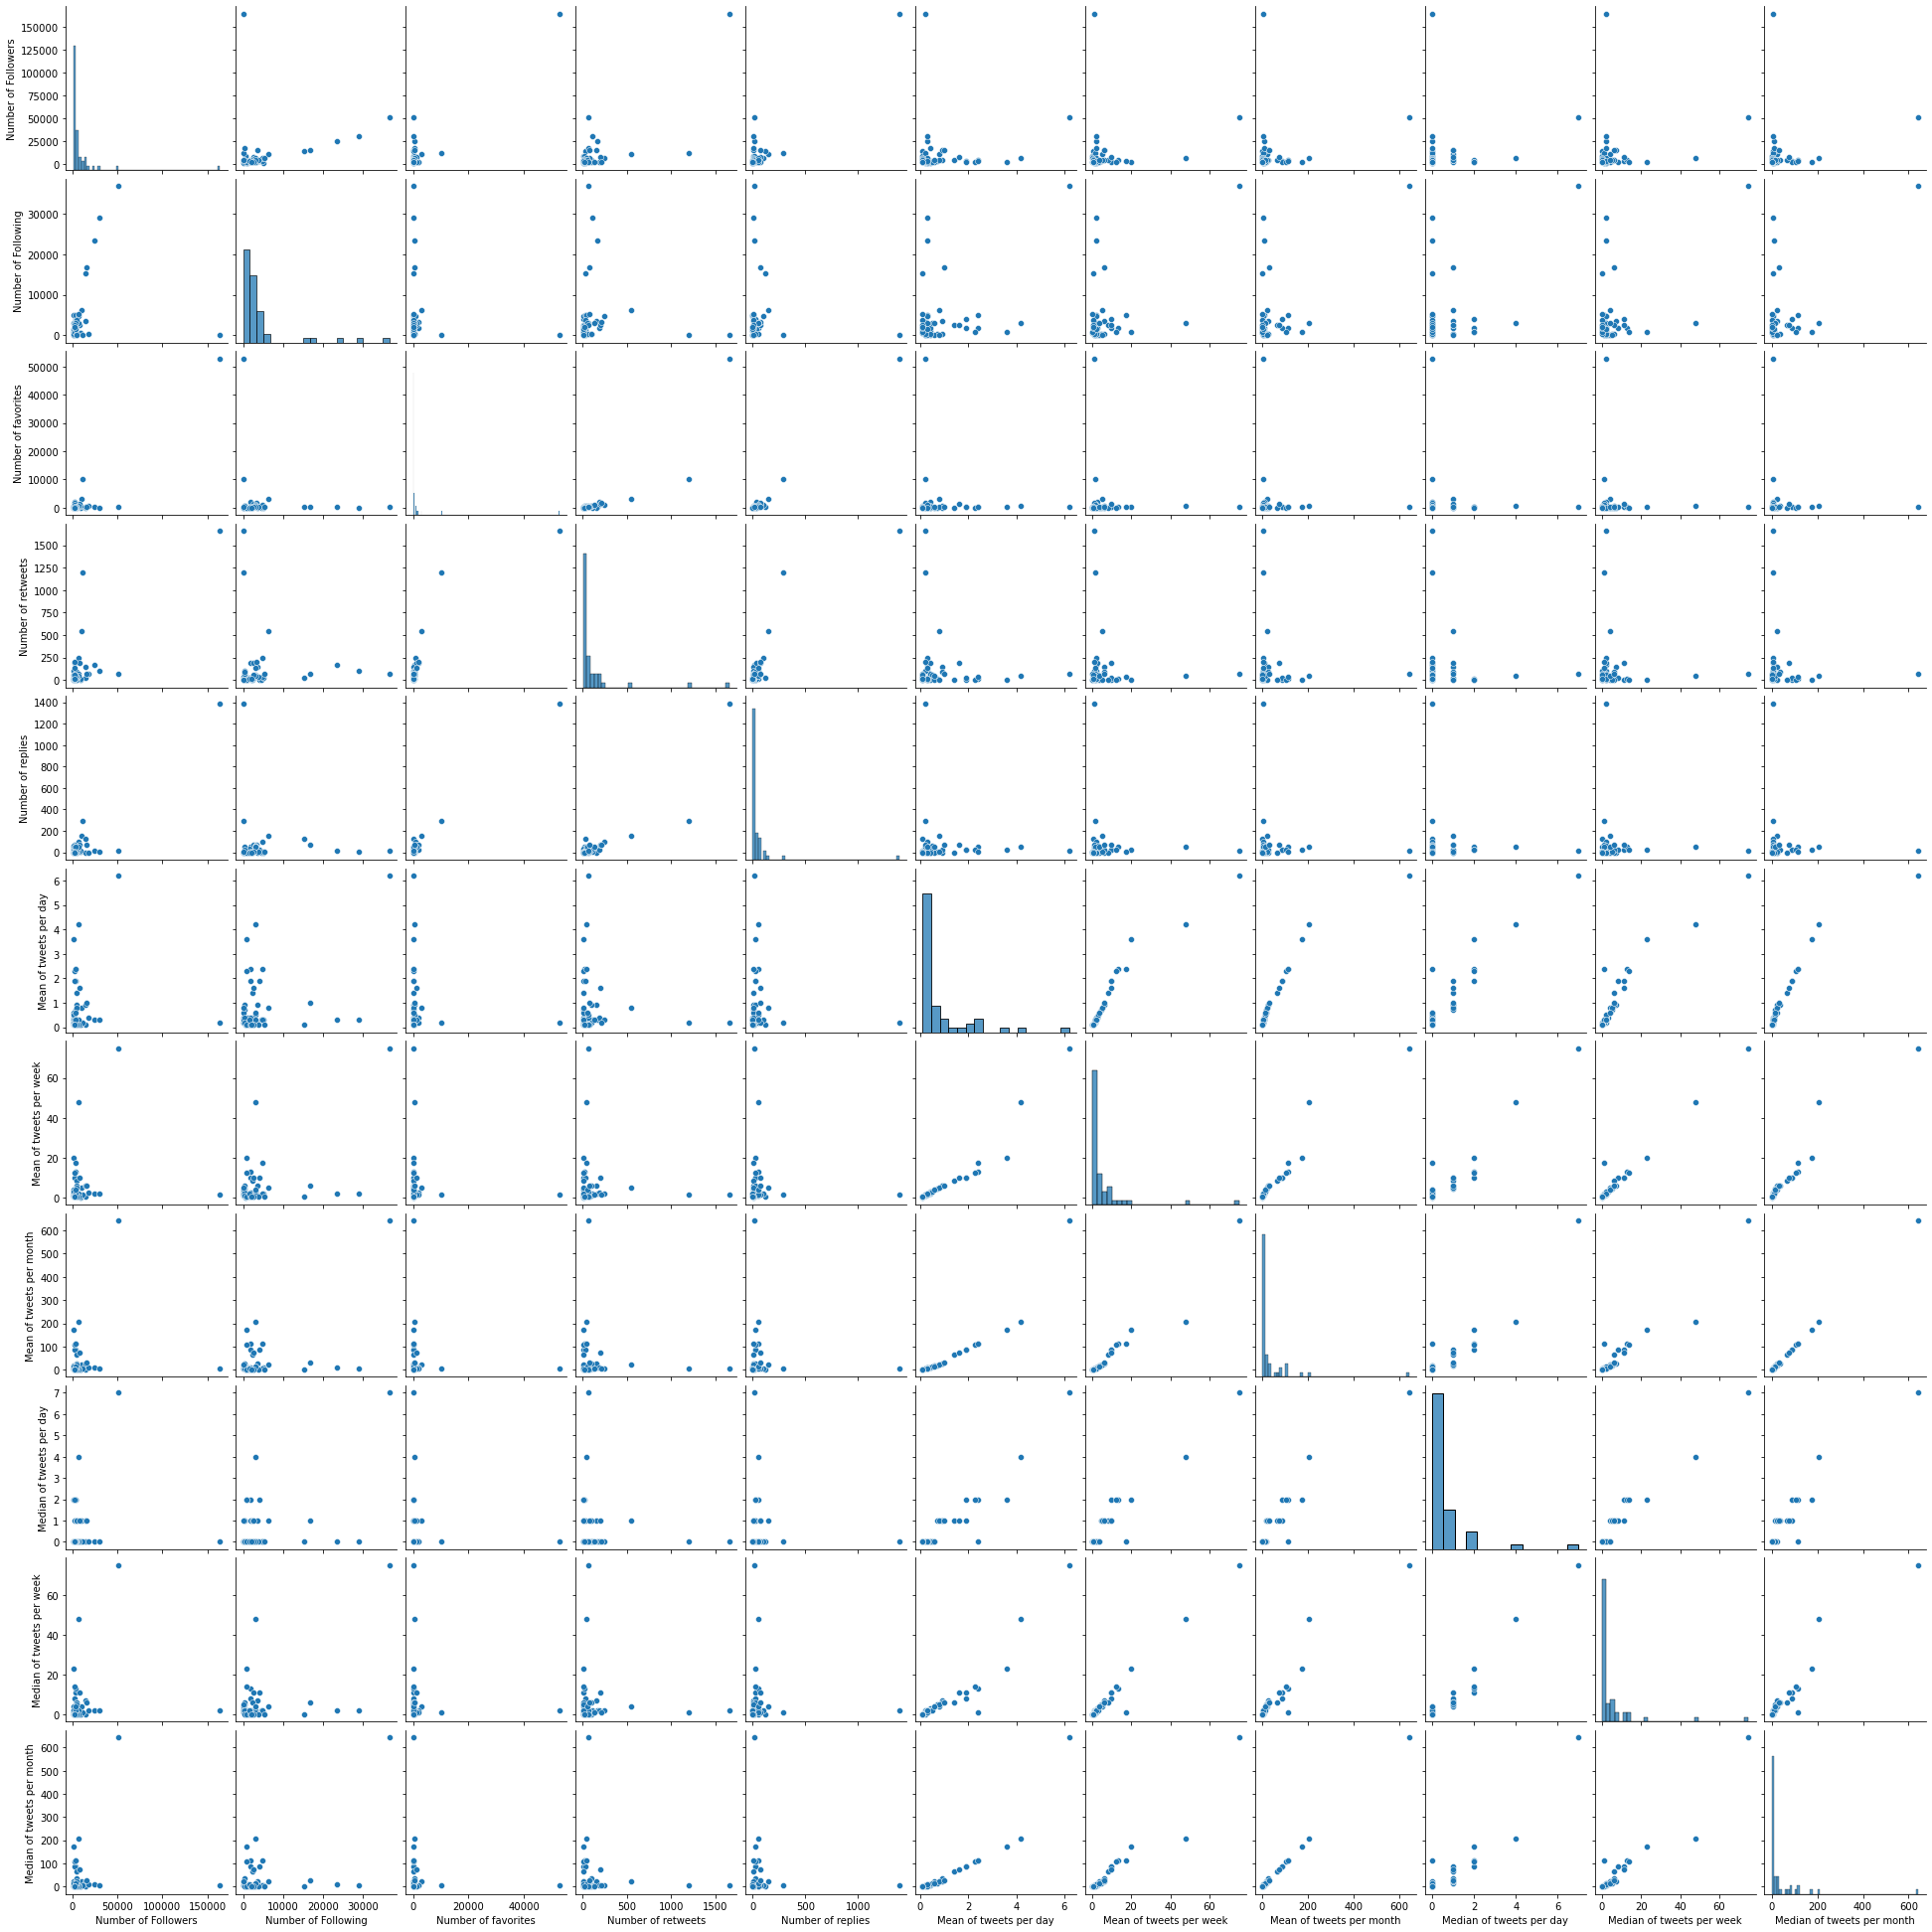

In [113]:
g = sns.pairplot(df2)

A correlation heatmap.

In [116]:
corr = df2.corr()
upp_mat = np.triu(corr)

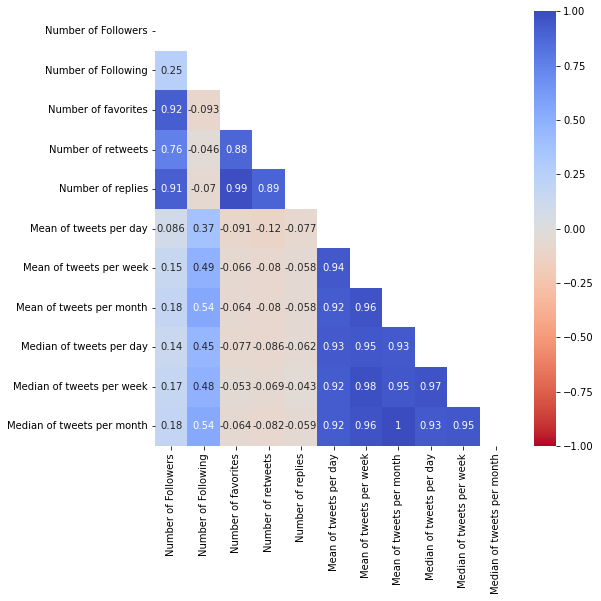

In [117]:
fig, ax = plt.subplots(figsize=(8, 8))

ax = sns.heatmap(corr, vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm_r', mask = upp_mat)


In [118]:
# logarithmic transform to gaussianize the data
#df2_log = df2.apply(lambda x: np.log( np.clip(x, a_min=0.001, a_max=100000) ))

In [119]:
#corr_log = df2_log.corr()
#upp_mat_log = np.triu(corr_log)

In [120]:
#fig, ax = plt.subplots(figsize=(10, 10))
#ax = sns.heatmap(corr_log, vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm_r', mask = upp_mat_log)


In [121]:
#ax = sns.pairplot(df2_log)